<a href="https://colab.research.google.com/github/Feiquanl/CS5100Project/blob/main/CS5100Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
# Read in data
df = pd.read_csv("Book_1_50.csv")
print(df.shape)
#df = df.head(500)
print(df.shape)

(29274, 12)
(29274, 12)


In [16]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"04 5, 2018",A3OFV8AGCZBR4Q,0061900621,{'Format:': ' Hardcover'},Marko Petrovic,My first born daughter loves this book and enj...,Big sissy loves this book,1522886400,NaN,NaN
1,5.0,True,"03 20, 2018",AFRZEPUFQ5MMC,0061900621,{'Format:': ' Hardcover'},Mr. Frank,daughter like it,Five Stars,1521504000,NaN,NaN
2,5.0,True,"03 7, 2018",A1S1CPDH3FQJGW,0061900621,{'Format:': ' Hardcover'},TMH21,I gave this book to a two and a half year old ...,A great gift.,1520380800,NaN,NaN
3,5.0,True,"02 6, 2018",AV4H0HWXRJN7C,0061900621,{'Format:': ' Hardcover'},Sara,My daughter loves babies and telling her shes ...,Big sister hit.,1517875200,NaN,NaN
4,5.0,True,"01 25, 2018",AGQHMKOP1I3DL,0061900621,{'Format:': ' Paperback'},Nancy Blaskewicz,This is the perfect book to give to a little g...,Good book when a new baby is expected.,1516838400,NaN,NaN


# EDA<br>
Exploratory Data Analysis

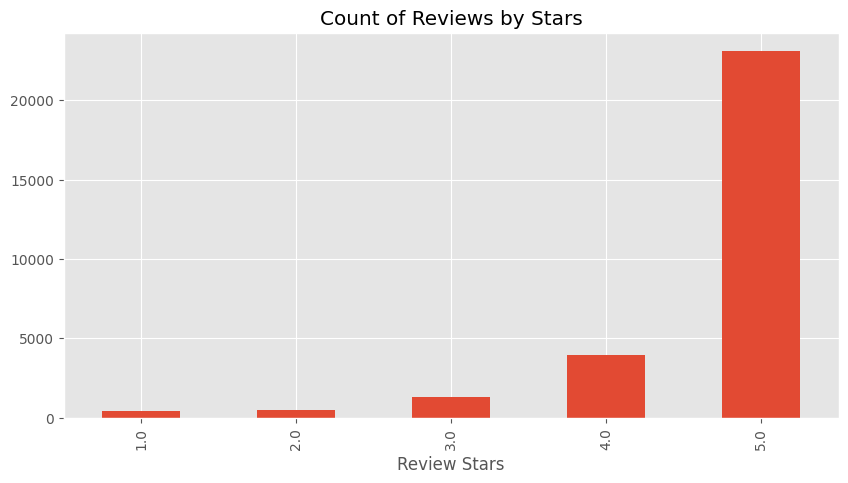

In [ ]:
# Count the occurrences of each unique value in the 'overall' column, which represents review ratings,
# and then sort these counts based on the index, which in this case is the review rating value itself.
ax = df['overall'].value_counts().sort_index() \
    .plot(kind='bar',  # Plot the counts as a bar chart.
          title='Count of Reviews by Stars',  # Set the title of the plot.
          figsize=(10, 5))  # Set the size of the plot to 10 inches wide by 5 inches tall.

# Set the label for the x-axis of the plot to 'Review Stars'.
ax.set_xlabel('Review Stars')

# Display the plot.
plt.show()

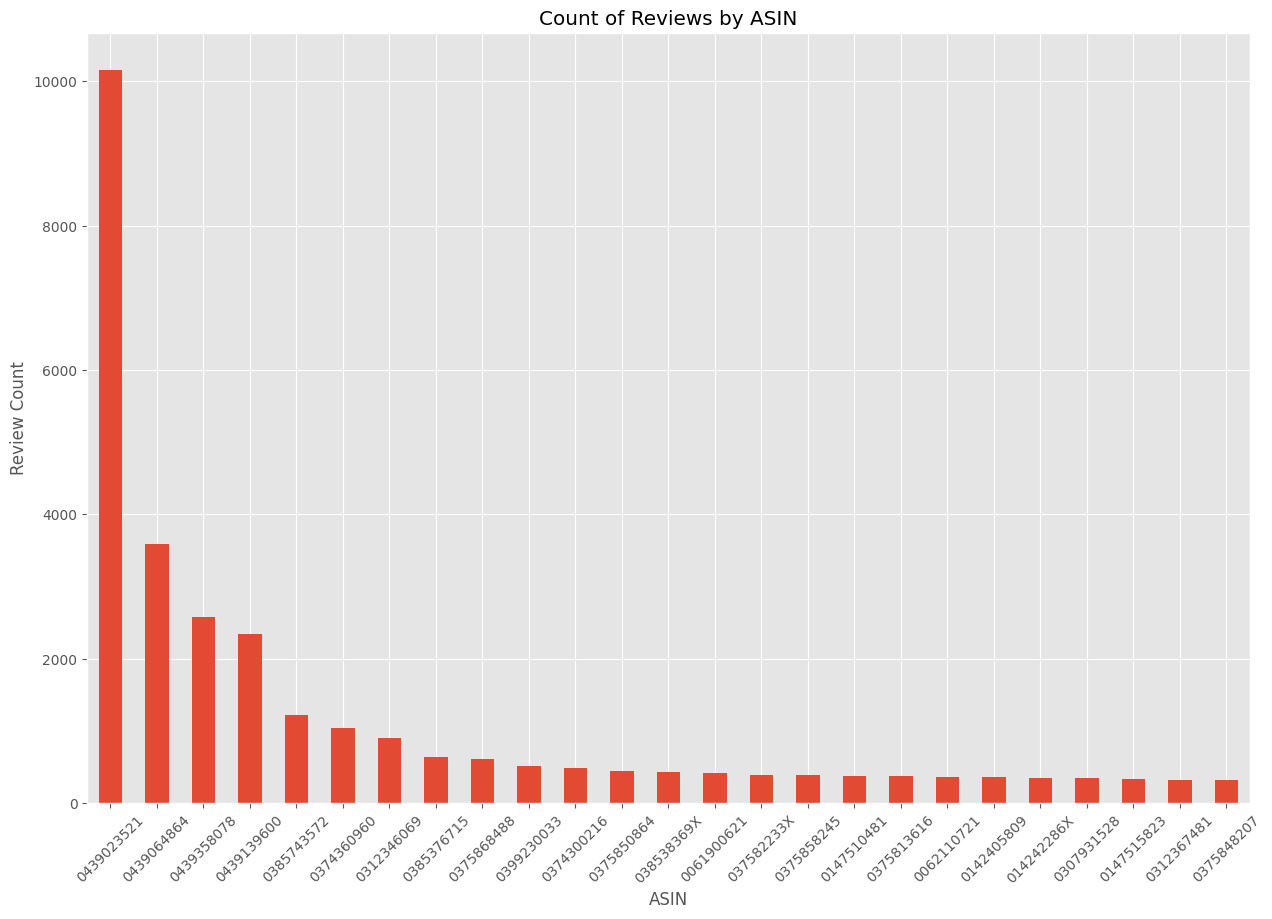

In [ ]:
# Group the DataFrame by 'asin' and count the reviews in each group
review_counts = df.groupby('asin')['overall'].count().sort_values(ascending=False)

# Plot the counts of reviews for each 'asin'
ax = review_counts.plot(kind='bar', title='Count of Reviews by ASIN', figsize=(15, 10))
ax.set_xlabel('ASIN')
ax.set_ylabel('Review Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels to make them readable
plt.show()

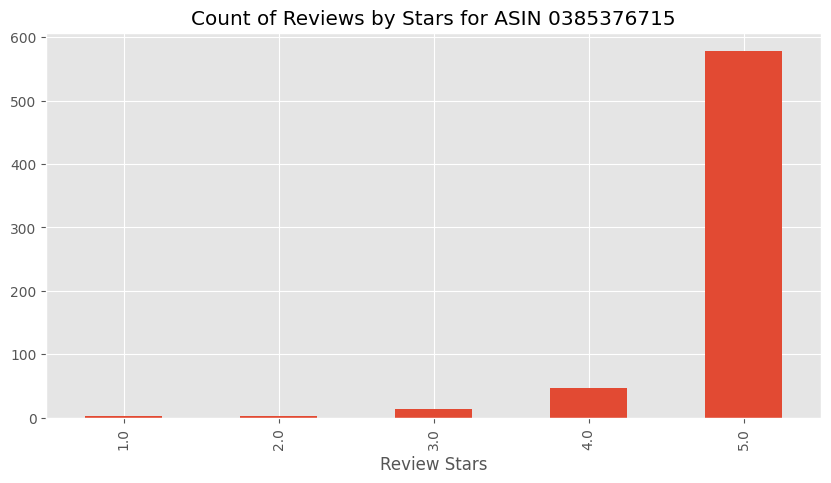

In [15]:
# Specify the ASIN interested in
target_asin ="0385376715"
# Filter the DataFrame for rows where the 'asin' column matches the target ASIN
filtered_df = df[df['asin'] == target_asin]
# Now, count the occurrences of each unique value in the 'overall' column of the filtered DataFrame
# and then sort these counts based on the index, which in this case is the review rating value itself.
ax = filtered_df['overall'].value_counts().sort_index() \
    .plot(kind='bar',  # Plot the counts as a bar chart.
          title=f'Count of Reviews by Stars for ASIN {target_asin}',  # Set the title of the plot, including the ASIN.
          figsize=(10, 5))  # Set the size of the plot to 10 inches wide by 5 inches tall.

# Set the label for the x-axis of the plot to 'Review Stars'.
ax.set_xlabel('Review Stars')

# Display the plot.
plt.show()

# NLTK<br>
Natural Language Toolkit